In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import nltk
from nltk.corpus import stopwords

In [5]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize as wt 
from autocorrect import Speller

In [6]:
train = pd.read_csv("sst/train.csv")
train.drop(["Unnamed: 0"], axis=1, inplace=True)
train.head()

,phrase,sentiment_values
0,The Rock is destined to be the 21st Century's ...,3
1,The gorgeously elaborate continuation of `` Th...,4
2,Singer\/composer Bryan Adams contributes a sle...,3
3,You'd think by now America would have had enou...,2
4,Yet the act is still charming here .,3


In [7]:
train.shape

(27483, 2)

In [8]:
test = pd.read_csv("sst/test.csv")
test.drop(["Unnamed: 0"], axis=1, inplace=True)
test.head()

,phrase,sentiment_values
0,Effective but too-tepid biopic,2
1,If you sometimes like to go to the movies to h...,3
2,"Emerges as something rare , an issue movie tha...",4
3,The film provides some great insight into the ...,2
4,Offers that rare combination of entertainment ...,4


In [9]:
test.shape

(2125, 2)

In [10]:
stemmer = PorterStemmer()

In [11]:
spell = Speller()

In [12]:
train_l = []

for i in range(train.shape[0]):

    if i%10==0:
      print(i, end=" ")
    sms = train.iloc[i, 0]

    sms = re.sub('[^A-Za-z]', ' ', sms)

    sms = sms.lower()

    tokenized_sms = wt(sms)
 
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(stemmer.stem(spell(word)))
    sms_text = " ".join(sms_processed)
    train_l.append(sms_text)

test_l = []

for i in range(test.shape[0]):

    if i%10==0:
      print(i, end=" ")
    sms = test.iloc[i, 0]

    sms = re.sub('[^A-Za-z]', ' ', sms)

    sms = sms.lower()

    tokenized_sms = wt(sms)
 
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(stemmer.stem(spell(word)))
    sms_text = " ".join(sms_processed)
    test_l.append(sms_text)

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200 2210 2

15510 15520 15530 15540 15550 15560 15570 15580 15590 15600 15610 15620 15630 15640 15650 15660 15670 15680 15690 15700 15710 15720 15730 15740 15750 15760 15770 15780 15790 15800 15810 15820 15830 15840 15850 15860 15870 15880 15890 15900 15910 15920 15930 15940 15950 15960 15970 15980 15990 16000 16010 16020 16030 16040 16050 16060 16070 16080 16090 16100 16110 16120 16130 16140 16150 16160 16170 16180 16190 16200 16210 16220 16230 16240 16250 16260 16270 16280 16290 16300 16310 16320 16330 16340 16350 16360 16370 16380 16390 16400 16410 16420 16430 16440 16450 16460 16470 16480 16490 16500 16510 16520 16530 16540 16550 16560 16570 16580 16590 16600 16610 16620 16630 16640 16650 16660 16670 16680 16690 16700 16710 16720 16730 16740 16750 16760 16770 16780 16790 16800 16810 16820 16830 16840 16850 16860 16870 16880 16890 16900 16910 16920 16930 16940 16950 16960 16970 16980 16990 17000 17010 17020 17030 17040 17050 17060 17070 17080 17090 17100 17110 17120 17130 17140 17150 17160 1717

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
matrix_train = CountVectorizer(max_features=1000)
X_train = matrix_train.fit_transform(train_l).toarray()
y_train = train.iloc[:, 1]

matrix_test = CountVectorizer(max_features=1000)
X_test = matrix_test.fit_transform(test_l).toarray()
y_test = test.iloc[:, 1]

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27483, 1000), (27483,), (2125, 1000), (2125,))

In [16]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((23686, 1000), (23686,), (5922, 1000), (5922,))

In [20]:
model = keras.models.Sequential()
model.add(layers.Dense(1000, activation='relu', input_shape=[1000]))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 250)               62750     
                                                                 
 dense_4 (Dense)             (None, 5)                 1255      
                                                                 
Total params: 1,690,755
Trainable params: 1,690,755
Non-trainable params: 0
_________________________________________________________________


In [21]:
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')


model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/50
926/926 [==============================] - 6s 4ms/step - loss: 1.3898 - accuracy: 0.4005 - val_loss: 1.0683 - val_accuracy: 0.5816
Epoch 2/50
926/926 [==============================] - 3s 4ms/step - loss: 0.8751 - accuracy: 0.6608 - val_loss: 0.3380 - val_accuracy: 0.8891
Epoch 3/50
926/926 [==============================] - 3s 4ms/step - loss: 0.3168 - accuracy: 0.8841 - val_loss: 0.1543 - val_accuracy: 0.9515
Epoch 4/50
926/926 [==============================] - 3s 4ms/step - loss: 0.1610 - accuracy: 0.9430 - val_loss: 0.1024 - val_accuracy: 0.9591
Epoch 5/50
926/926 [==============================] - 3s 4ms/step - loss: 0.1176 - accuracy: 0.9555 - val_loss: 0.0967 - val_accuracy: 0.9620
Epoch 6/50
926/926 [==============================] - 3s 4ms/step - loss: 0.1100 - accuracy: 0.9587 - val_loss: 0.0902 - val_accuracy: 0.9669
Epoch 7/50
926/926 [==============================] - 3s 4ms/step - loss: 0.1088 - accuracy: 0.9577 - val_loss: 0.0832 - val_accuracy: 0.9671
Epoch 

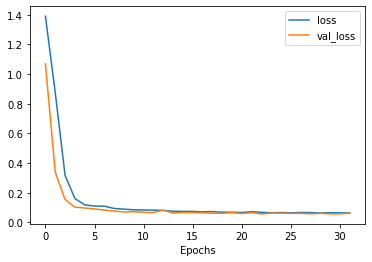

In [88]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

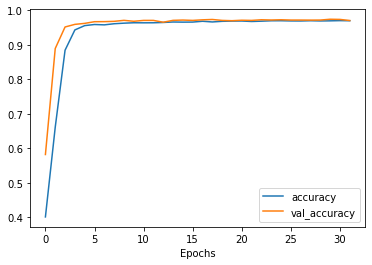

In [89]:
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [24]:
model.evaluate(X_test, y_test)

186/186 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9703


[0.06275403499603271, 0.9702802896499634]

In [26]:
y_pred = model.predict(X_test).argmax(axis=1)
y_pred

186/186 [==============================] - 0s 1ms/step


array([3, 1, 4, ..., 1, 4, 1], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

acc = accuracy_score(y_test, y_pred)
precision, recall, f_score, support = precision_recall_fscore_support(y_test, y_pred)

In [33]:
metrics = pd.DataFrame({"values": [0, 1, 2, 3, 4], 
                        "Precision": [precision[0], precision[1], precision[2], precision[3], precision[4]],
                        "Recall": [recall[0], recall[1], recall[2], recall[3], recall[4]],
                        "F Score": [f_score[0], f_score[1], f_score[2], f_score[3], f_score[4]],
                        "Support": [support[0], support[1], support[2], support[3], support[4]],
                       } )
print(f"Accuracy = {acc}")
metrics

Accuracy = 0.9702803107058426


,values,Precision,Recall,F Score,Support
0,0,0.991525,0.934754,0.962303,751
1,1,0.966821,0.973930,0.970363,1496
2,2,0.926770,0.970187,0.947982,1174
3,3,0.986361,0.980888,0.983617,1622
4,4,0.990751,0.974972,0.982798,879


In [34]:
model.save("model.pkl")

INFO:tensorflow:Assets written to: model.pkl\assets


In [81]:
def preprocess(phrase):
    
    phrase = re.sub('[^A-Za-z]', ' ', phrase)

    phrase = phrase.lower()

    tokenized_phrase = wt(phrase)
 
    phrase_processed = []
    for word in tokenized_phrase:
        if word not in set(stopwords.words('english')):
            phrase_processed.append(stemmer.stem(spell(word)))
    phrase_text = " ".join(phrase_processed)
    
    matrix_train = CountVectorizer(max_features=1000)
    matrix_train.fit(train_l)
    phrase_vector = matrix_train.transform([phrase_text]).toarray()
    
    return phrase_vector

def predict_sentiment(phrase):
    features = preprocess(phrase)
    return model.predict(features, verbose=False).argmax()

In [82]:
predict_sentiment("This is really an amazing product bro!!")

4

In [83]:
predict_sentiment("This is really an very bad product bro!!")

0

In [84]:
predict_sentiment("Usable one, not so great")

3

In [85]:
predict_sentiment("okayish")

2

In [87]:
while(True):
    comment = input("Your Comment: ")
    if comment == "stop":
        break
    else:
        sent = predict_sentiment(comment)
        print(f"Your Sentiment For the comment is: {sent}")

Your Comment: Amazing Scenary
Your Sentiment For the comment is: 4
Your Comment: Worst Picture
Your Sentiment For the comment is: 0
Your Comment: Average Picture
Your Sentiment For the comment is: 3
Your Comment: Loved it
Your Sentiment For the comment is: 3
Your Comment: Hate it
Your Sentiment For the comment is: 0
Your Comment: stop


In [128]:
import os
pics = os.listdir("pictures")

cats = dict()
cat_map = dict()

for pic in pics:
    stri = pic.split("_")[0]
    if stri in cats.keys():
        cat_map[stri].append(pic)
    else:
        cat_map[stri] = []
        cat_map[stri].append(pic)
        cats[stri] = 0

In [129]:
cats

{'art': 0, 'city': 0, 'people': 0, 'scenary': 0}

In [130]:
cat_map

{'art': ['art_1.webp', 'art_2.jpg', 'art_3.jpg', 'art_4.jpg'],
 'city': ['city_1.jpg', 'city_2.jpg', 'city_3.jpg', 'city_4.jpg'],
 'people': ['people_1.jpg', 'people_2.jpg', 'people_3.jpg'],
 'scenary': ['scenary_1.jpg',
  'scenary_2.jpg',
  'scenary_3.jpg',
  'scenary_4.jpg']}

In [132]:
import random
a = [1,3,4,5]
random.choice(a)

4

In [165]:
import cv2
import random
def recomend(cats, cat_map):
    idx = np.array(list(cats.values())).argmax()
    rec = list(cats.keys())[idx]
    img_path = random.choice(cat_map[rec])
    img = cv2.imread("pictures/" + img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return rec

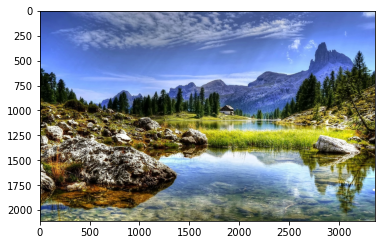

Your Comment: amazing
Your Sentiment For the comment is: 2


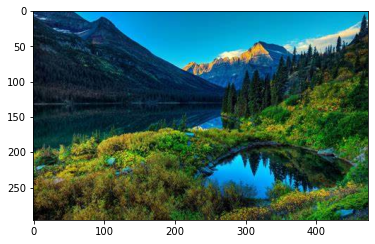

Your Comment: worst
Your Sentiment For the comment is: -2


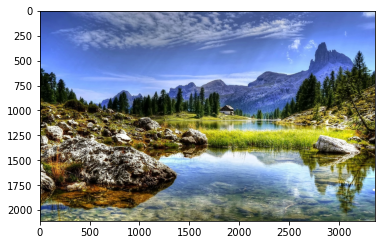

Your Comment: bad
Your Sentiment For the comment is: -1


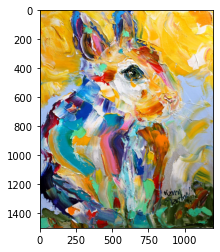

Your Comment: bad
Your Sentiment For the comment is: -1


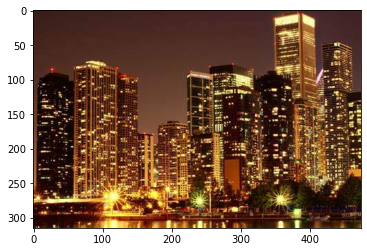

Your Comment: amazing
Your Sentiment For the comment is: 2


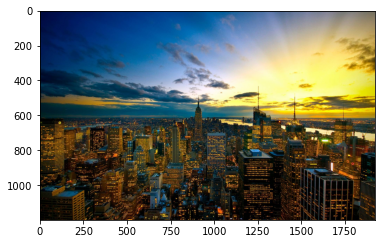

Your Comment: stop


In [167]:
while(True):
    rec = recomend(cats, cat_map)
    comment = input("Your Comment: ")
    if comment == "stop":
        break
    else:
        sent = predict_sentiment(comment)
        sent -= 2
        print(f"Your Sentiment For the comment is: {sent}")
        cats[rec] += sent